<a href="https://colab.research.google.com/github/joshthesteez/image-to-text/blob/main/UberAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and File Structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder

file_path = "/content/drive/MyDrive/Colab_Notebooks/ML_Portfolio/Uber Data Visualization/UberDataset.csv"

if not os.path.exists(file_path):
    print(f"ERROR: '{file_path}' does not exist")
else:
    # read the dataset into a pandas dataframe and inspect its properties
    dataset = pd.read_csv(file_path)

    print("dataset before preprocessing: \n")
    print(f"Shape: {dataset.shape}\n")
    print(dataset.info())


dataset before preprocessing: 

Shape: (1156, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


# Data Preprocessing
We need to:

1.   Get rid of all the null values in the purpose column
2.   Change the START_DATE and END_DATE columns to ***datetime*** format
3.   Split the START_DATE column into into a *date* and *time* column and establish 4 'time zones' for the day
4.   Drop duplicate rows and rows with null values



In [2]:
  # replace null values in PURPOSE column with NOT values
  dataset['PURPOSE'].fillna(value="NOT", inplace=True)
  # change the datatype of START_DATE & END_DATE to date_time format
  dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
  dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

  dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
  dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

  dataset['day-night'] = pd.cut(x=dataset['time'],
                                  bins = [0,10,15,19,24],
                                  labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

  dataset.dropna(inplace=True)
  dataset.drop_duplicates(inplace=True)

  print("dataset after preprocessing: \n")
  print(f"Shape: {dataset.shape}\n")
  print(dataset.info())

dataset after preprocessing: 

Shape: (1135, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1135 non-null   datetime64[ns]
 1   END_DATE    1135 non-null   datetime64[ns]
 2   CATEGORY    1135 non-null   object        
 3   START       1135 non-null   object        
 4   STOP        1135 non-null   object        
 5   MILES       1135 non-null   float64       
 6   PURPOSE     1135 non-null   object        
 7   date        1135 non-null   object        
 8   time        1135 non-null   float64       
 9   day-night   1135 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 90.0+ KB
None


# Data Visualization

First lets look at how many unique values are located in columns with object datatypes

In [3]:
print(f"Columns with 'object' datatype: \n{dataset.dtypes == 'object'}\n")

obj = (dataset.dtypes == 'object')
object_cols = dataset.select_dtypes(include=['object']).columns.tolist()

unique_vals = {}
for col in object_cols:
    try:
        unique_vals[col] = dataset[col].unique().size
    except KeyError as e:
        print(f"Error: Column '{col}' not found in the DataFrame.")
        continue

print(f"Unique values count in each object column: \n{unique_vals}")

Columns with 'object' datatype: 
START_DATE    False
END_DATE      False
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
date           True
time          False
day-night     False
dtype: bool

Unique values count in each object column: 
{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}


Looking at the **CATEGORY** column, we see that there are two options: *Business* and *Personal*

Lets compare the amount of trips taken for Business vs. Personal

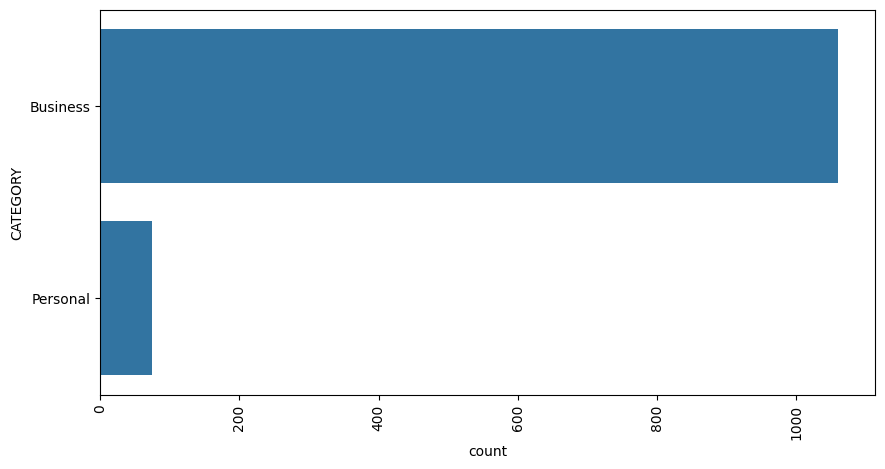

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.show()

We see that the vast majority of trips taken are for **Business**, thus the statistical significance of **Personal** trips is negligible

The **PURPOSE** column gives us a little more insight into the intention behind these trips...

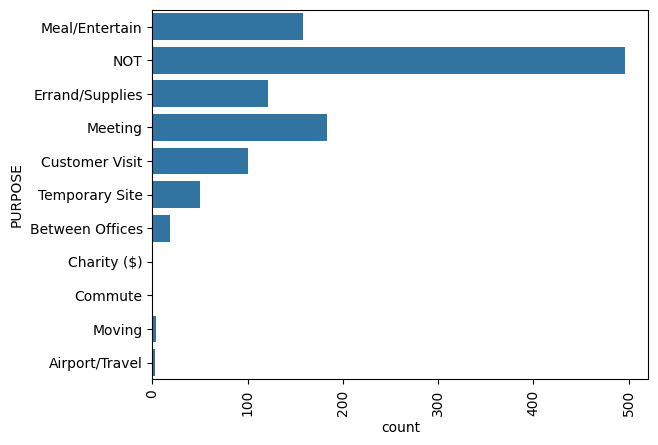

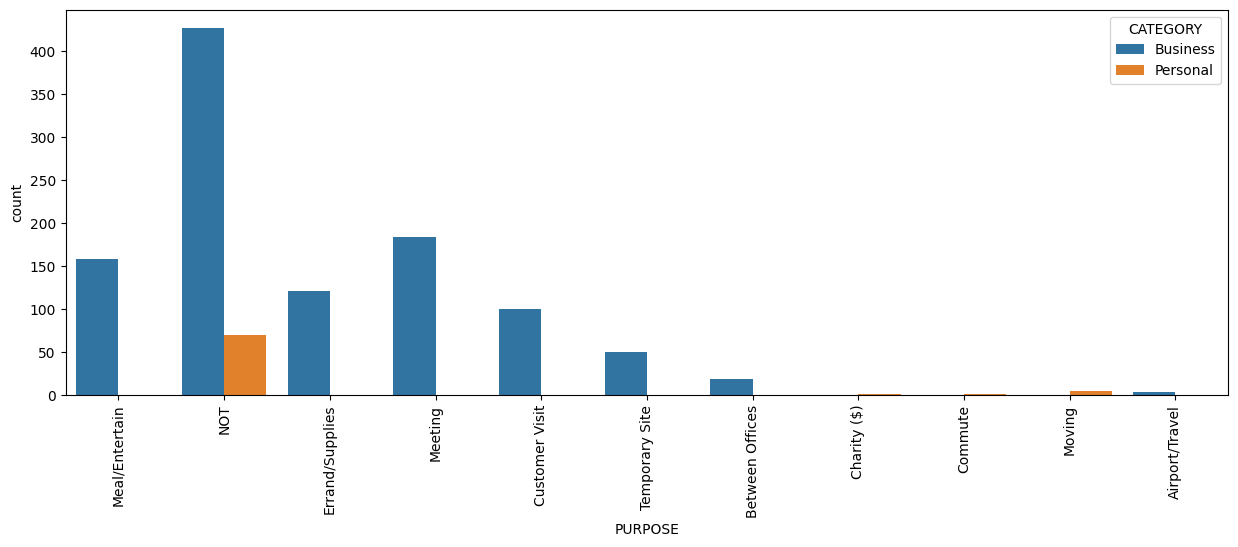

In [5]:
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

As we can see, most customers decided to leave the **PURPOSE** column blank, with the top 3 most popular categories being:


1.   Meeting
2.   Meal / Entertainment
3.   Errand / Supplies

Plotting the Business vs Personal categories as a count of **PURPOSE** again reinforces the idea that Personal trips are not contributing much to the overall statistical significance

Now, let's break down the **day-night** column to see when the most popular time to order an Uber is

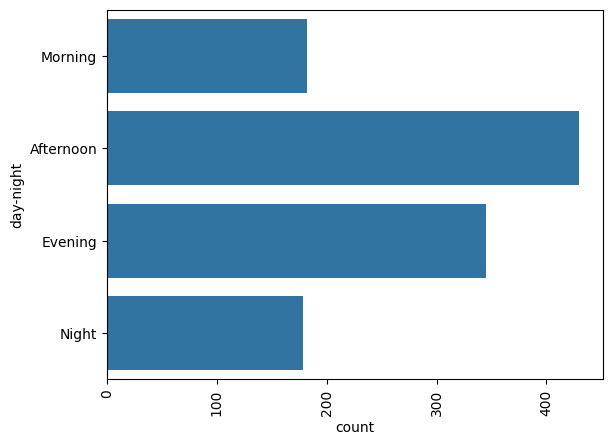

In [6]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

plt.show()

As we can see, most customers order an Uber in the afternoon or the evening. Earlier we defined the hours

 10:00AM - 3:00PM | Afternoon
 3:00PM - 9:00PM  | Evening

 So the most popular time to order an uber is between the hours of 10:00AM - 9:00PM

 Now let's look at a heatmap of the **CATEGORY** and **PURPOSE** columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1154
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1135 non-null   datetime64[ns]
 1   END_DATE    1135 non-null   datetime64[ns]
 2   CATEGORY    1135 non-null   object        
 3   START       1135 non-null   object        
 4   STOP        1135 non-null   object        
 5   MILES       1135 non-null   float64       
 6   PURPOSE     1135 non-null   object        
 7   date        1135 non-null   object        
 8   time        1135 non-null   float64       
 9   day-night   1135 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 90.0+ KB
dataset info: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1154
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  ----- 

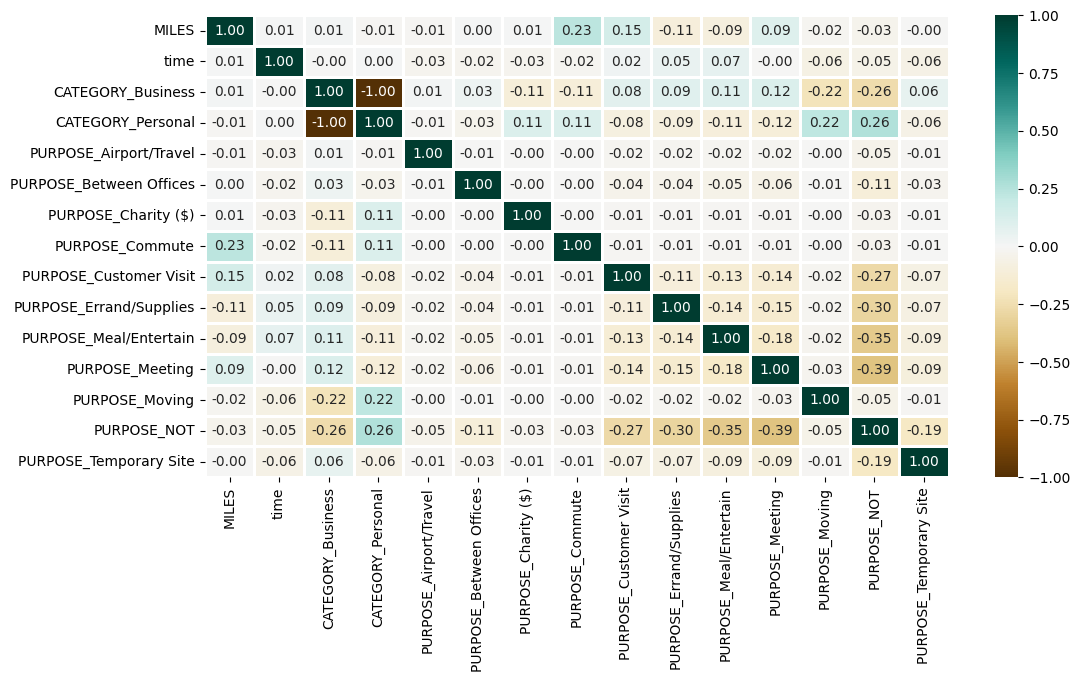

In [7]:
numerical_cols = dataset.select_dtypes(include=['float64']).columns
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]).toarray())
OH_cols.index = dataset.index
feature_names = OH_encoder.get_feature_names_out(object_cols)
OH_cols.columns = feature_names
num_dataset = pd.concat([dataset[numerical_cols], OH_cols], axis=1)

print(f"dataset info: {dataset.info()}")
print(f"num_dataset info: {num_dataset.info()}")

plt.figure(figsize=(12, 6))
sns.heatmap(num_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.show()

We see here a very large negative correlation between the *BUSINESS* and *PERSONAL* categories with no real correlation between the other features

Now let's visualize the MONTH data...

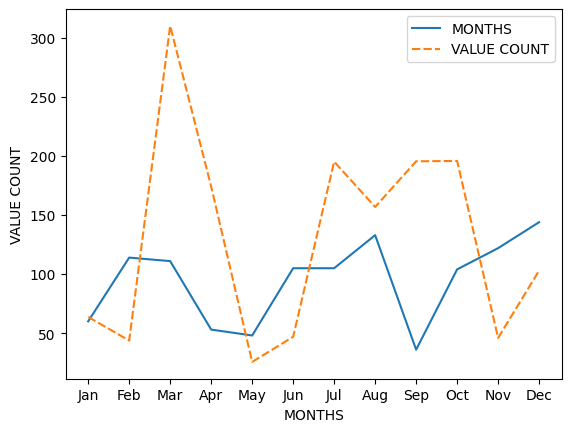

In [8]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar',
               4.0: 'Apr', 5.0: 'May', 6.0: 'Jun',
               7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep',
               10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset['MONTH'] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH', sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

plt.show()


We see here that the counts are still very irregular.

Following the MONTH line tells us that more rides are ordered in the Winter and Summer months of January, February, December, June, July and August

Now let's try to draw some insights about what days are most popular to order an Uber

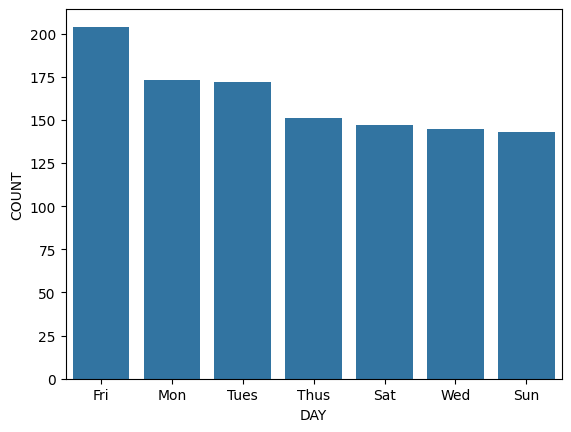

In [11]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_labels = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus',
             4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_labels)

day_labels = dataset.DAY.value_counts()
sns.barplot(x=day_labels.index, y=day_labels)
plt.xlabel('DAY')
plt.ylabel('COUNT')

plt.show()

We see here that Friday has a slight edge over the next most popular day, Monday, but overall it seems that there is a relatively even distribution of Uber ride requests by day.

Now we will look at ride distance to see if there is anything worth noting.

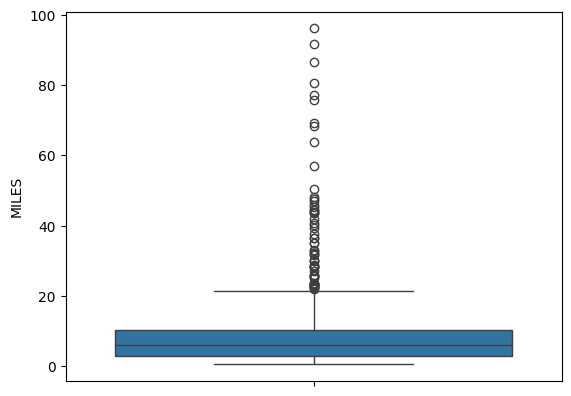

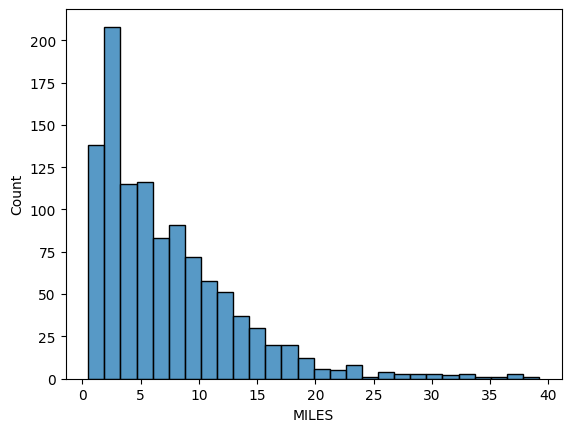

In [10]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])
plt.show()

sns.histplot(dataset[dataset['MILES']<40]['MILES'])
plt.show()

Judging by the boxplot, we see that the majority of rides are within a distance of 0 - 10 miles.

Narrowing in on this range with the histplot, we see that an overwhelming majority of Uber rides were within a distance of roughly 2 miles, with some rides being 10 miles or more, and an overwhelming majority of rides are under 25 miles in distance.